<img src="imgs/grid_search_cross_validation.png" width="100%">

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## K-Fold

In [17]:
import numpy as np
random_ = np.random.RandomState(0)
permutation = random_.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

[0 0 1 1 2 1 1 1 0 2 0 1 0 0 2 2 0 2 1 0 0 0 2 2 2 2 2 0 1 0 1 0 0 0 0 1 1
 1 2 2 1 2 2 0 0 2 2 1 0 2 1 1 0 1 0 1 2 2 0 2 2 2 2 0 1 0 0 2 2 2 0 1 2 1
 2 0 2 1 2 2 0 2 0 1 1 0 0 2 2 1 2 0 1 2 1 1 1 1 1 2 0 0 2 0 2 2 1 0 1 2 2
 1 1 2 0 2 0 2 1 1 1 0 1 0 1 1 1 1 1 0 2 1 2 2 0 0 0 0 2 1 1 0 2 0 1 1 0 0
 1 0]


In [18]:
k = 5
n_samples = len(X)
fold_size = n_samples // k
scores = []
masks = []
for fold in range(k):
    # generate a boolean mask for the test set in this fold
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[fold * fold_size : (fold + 1) * fold_size] = True
    # store the mask for visualization
    masks.append(test_mask)
    # create training and test sets using this mask
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]
    # fit the classifier
    classifier.fit(X_train, y_train)
    # compute the score and record it
    scores.append(classifier.score(X_test, y_test))

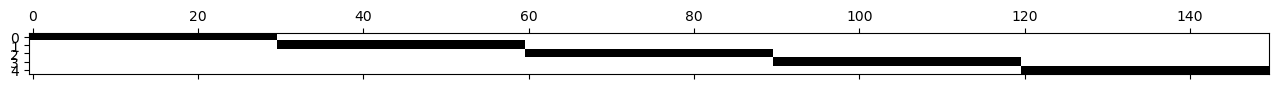

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(masks, cmap='gray_r');

In [20]:
print(scores)

[1.0, 0.9666666666666667, 0.9333333333333333, 0.9, 1.0]


In [21]:
print(np.mean(scores))

0.9600000000000002


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)
print(np.mean(scores))

[1.         0.96666667 0.9        0.93333333 1.        ]
0.96


In [23]:
cross_val_score(classifier, X, y, cv=5)

array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ])

In [24]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

## Stratified K-Fold

In [25]:
cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(iris.data, iris.target):
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


In [26]:
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks, cmap='gray_r')

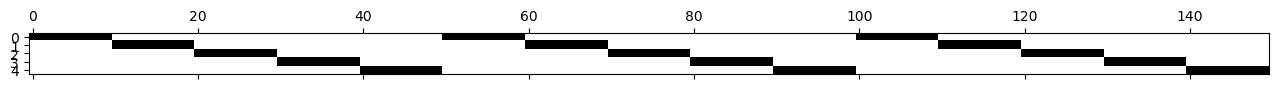

In [27]:
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

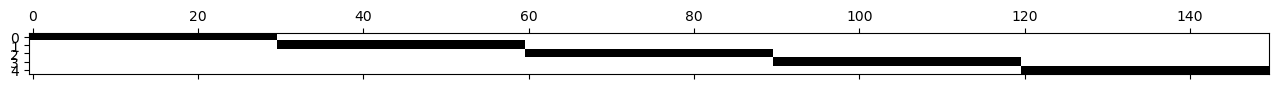

In [28]:
plot_cv(KFold(n_splits=5), iris.data, iris.target)

## Shuffle Split

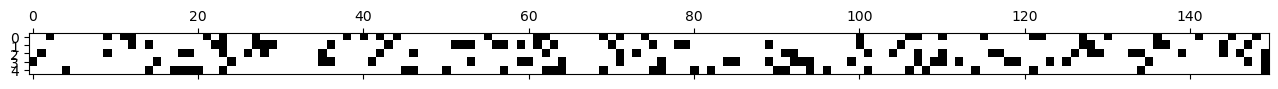

In [31]:
plot_cv(ShuffleSplit(n_splits=5, test_size=.2), iris.data, iris.target)

If you want a more robust estimate, you can just increase the number of splits:

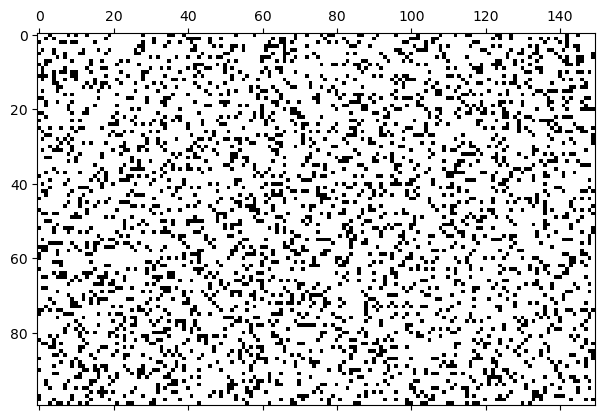

In [32]:
plot_cv(ShuffleSplit(n_splits=100, test_size=.2), iris.data, iris.target)

In [33]:
cv = ShuffleSplit(n_splits=5, test_size=.2)
cross_val_score(classifier, X, y, cv=cv)

array([1.        , 1.        , 1.        , 0.96666667, 0.96666667])

In [34]:
cross_val_score(classifier, X, y, cv=cv).mean()

0.9666666666666668

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Perform three-fold cross-validation using the ``KFold`` class on the iris dataset without shuffling the data. Can you explain the result?
      </li>
    </ul>
</div>

In [37]:
# %load solutions/cross_validation.py

# Hyperparameter selection, Validation, and Testing

<img src="imgs/knn_over_under.png" width="100%">

In [58]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
# generate toy dataset:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.normal(size=len(x))
X = x[:, np.newaxis]

cv = KFold(shuffle=True)

# for each parameter setting do cross-validation:
for n_neighbors in [1, 3, 5, 10, 20]:
    scores = cross_val_score(KNeighborsRegressor(n_neighbors=n_neighbors), X, y, cv=cv)
    print("n_neighbors: %d, average score: %f" % (n_neighbors, np.mean(scores)))

n_neighbors: 1, average score: 0.487936
n_neighbors: 3, average score: 0.668453
n_neighbors: 5, average score: 0.721912
n_neighbors: 10, average score: 0.762067
n_neighbors: 20, average score: 0.628396


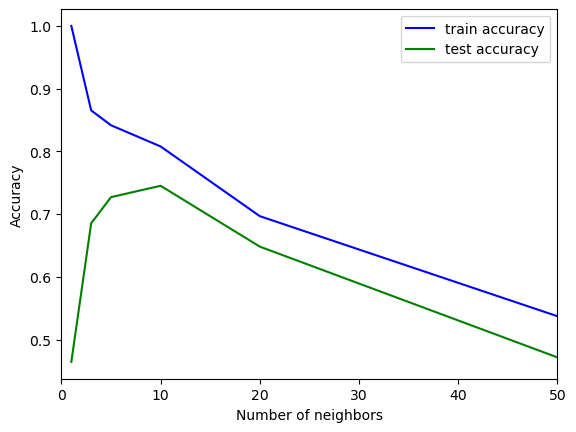

In [56]:
from sklearn.model_selection import validation_curve
n_neighbors = [1, 3, 5, 10, 20, 50]
train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, param_name="n_neighbors",
                                             param_range=n_neighbors, cv=cv)
plt.plot(n_neighbors, train_scores.mean(axis=1), 'b', label="train accuracy")
plt.plot(n_neighbors, test_scores.mean(axis=1), 'g', label="test accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.xlim([0, 50])
plt.legend(loc="best");

If multiple parameters are important, like the parameters ``C`` and ``gamma`` in an ``SVM``, all possible combinations are tried:

In [40]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR

# each parameter setting do cross-validation:
for C in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        scores = cross_val_score(SVR(C=C, gamma=gamma), X, y, cv=cv)
        print("C: %f, gamma: %f, average score: %f" % (C, gamma, np.mean(scores)))

C: 0.001000, gamma: 0.001000, average score: -0.301393
C: 0.001000, gamma: 0.010000, average score: -0.101159
C: 0.001000, gamma: 0.100000, average score: -0.002769
C: 0.001000, gamma: 1.000000, average score: -0.077850
C: 0.010000, gamma: 0.001000, average score: -0.088034
C: 0.010000, gamma: 0.010000, average score: -0.094651
C: 0.010000, gamma: 0.100000, average score: 0.048147
C: 0.010000, gamma: 1.000000, average score: 0.067948
C: 0.100000, gamma: 0.001000, average score: -0.154902
C: 0.100000, gamma: 0.010000, average score: 0.176979
C: 0.100000, gamma: 0.100000, average score: 0.520727
C: 0.100000, gamma: 1.000000, average score: 0.498986
C: 1.000000, gamma: 0.001000, average score: -0.054774
C: 1.000000, gamma: 0.010000, average score: 0.570026
C: 1.000000, gamma: 0.100000, average score: 0.642095
C: 1.000000, gamma: 1.000000, average score: 0.715549
C: 10.000000, gamma: 0.001000, average score: 0.602894
C: 10.000000, gamma: 0.010000, average score: 0.522105
C: 10.000000, gamm

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv)

In [42]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [43]:
grid.predict(X)

array([-1.79762875, -1.74054091, -1.71412904, -1.72272347, -1.76880247,
       -1.8527208 , -1.97255382, -2.12407501, -2.30087676, -2.49463429,
       -2.695503  , -2.89262935, -3.07474705, -3.23082299, -3.35071314,
       -3.42578612, -3.44947391, -3.41771237, -3.32924127, -3.18574205,
       -2.9918017 , -2.75470244, -2.48404785, -2.19124658, -1.88888388,
       -1.59001819, -1.30744475, -1.05297034, -0.8367425 , -0.66667333,
       -0.54799235, -0.4829551 , -0.4707249 , -0.50743515, -0.58642852,
       -0.69865919, -0.83323456, -0.97806438, -1.12057877, -1.24847261,
       -1.35043139, -1.41679516, -1.44012026, -1.41560488, -1.3413525 ,
       -1.21845724, -1.05090633, -0.84530623, -0.61045003, -0.35675398,
       -0.09559933,  0.16137852,  0.40300817,  0.61926205,  0.80185531,
        0.94472644,  1.04437082,  1.10000798,  1.11357463,  1.08954695,
        1.03460678,  0.95717608,  0.86685224,  0.7737823 ,  0.68801751,
        0.61888941,  0.57444669,  0.56098656,  0.58270777,  0.64

In [44]:
print(grid.best_score_)

0.7309384205153722


In [45]:
print(grid.best_params_)

{'C': 10, 'gamma': 1}


In [46]:
import pandas as pd
cv_results = pd.DataFrame(grid.cv_results_)
cv_results_tiny = cv_results[['param_C', 'param_gamma', 'mean_test_score']]
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head()

,param_C,param_gamma,mean_test_score
19,10,1,0.730938
15,1,1,0.697680
14,1,0.1,0.663380
18,10,0.1,0.658515
17,10,0.01,0.628986
